## Stability
Defined by \frec{#patches in label i }/{# all patches} 

In [1]:
import os
import sys
import glob
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import _get_colors

In [4]:
datadir = '/home/tkurihana/scratch-midway2/anl/output_2000_2018_random'

### n_cluster = 10

In [5]:
n_cluster = 10

In [6]:
a = np.load(datadir+'/sd_p-1500.0_nc-10_m22_agu_spark_patches_labels_2000-2018-random.npy')

In [7]:
clusters = []
nall = 1500*1000
for i in range(n_cluster):
    clusters += [len(np.argwhere(a == i))/nall*100]

In [8]:
clusters

[0.8230666666666667,
 4.108866666666667,
 5.748466666666667,
 6.625,
 7.2916,
 17.4982,
 19.124333333333333,
 19.710733333333334,
 14.869333333333334,
 4.2004]

In [9]:
ranges = [1,10,200,300,400,500,600,1000,1500]
ratio_list = []
for inum in ranges:
    clusters = []
    iarray = np.load(datadir+'/sd_p-'+str(inum)+'.0_nc-'+str(n_cluster)+'_m22_agu_spark_patches_labels_2000-2018-random.npy')
    nall = inum * 1000 # unit = 1,000 patches
    for icluster in range(n_cluster) :
        clusters += [ len(np.argwhere(iarray == icluster))/nall*100]
    ratio_list += [clusters]
ratio_array = np.asarray(ratio_list) #np.array

In [10]:
ratio_array.shape

(9, 10)

In [11]:
colors = _get_colors(n=n_cluster)

Text(0.5, 0, ' # patches')

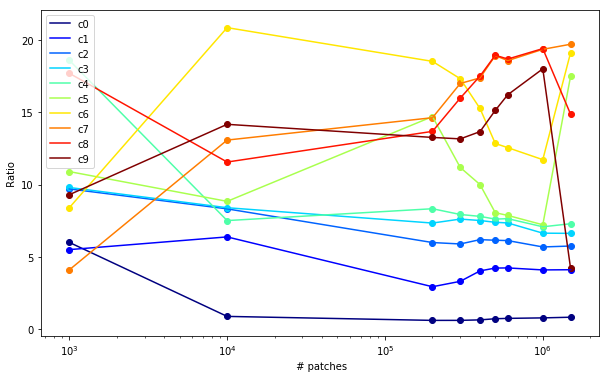

In [17]:
plt.figure(figsize=(10,6))
for i in range(n_cluster):
    plt.plot([x*1000 for x in ranges], ratio_array[:,i],color=colors[i], label='c'+str(i))
    plt.scatter([ x * 1000 for x in ranges], ratio_array[:,i], color=colors[i])
    plt.xscale("log")
plt.legend(loc='upper left')
plt.ylabel(" Ratio ")
plt.xlabel(" # patches")
#plt.grid(which='major',color='black',linestyle='-')
#plt.grid(which='minor',color='black',linestyle='-')

### Other cluster numbers

In [18]:
ranges = [1,10,100,500,1500]

In [19]:
n_clusters = [3,4,5,6,7,8,10,12,14,16,18,20,22,24,26,28]

In [20]:
cluster_list = []
for n_cluster in n_clusters:
    ratio_list = []
    for inum in ranges:
        clusters = []
        iarray = np.load(datadir+'/sd_p-'+str(inum)+'.0_nc-'+str(n_cluster)+'_m22_agu_spark_patches_labels_2000-2018-random.npy')
        nall = inum * 1000 # unit = 1,000 patches
        for icluster in range(n_cluster) :
            clusters += [ len(np.argwhere(iarray == icluster))/nall*100]
        ratio_list += [clusters]
    cluster_list += [ratio_list]
ratio_array = np.asarray(cluster_list) #np.array

In [21]:
ratio_array.shape

(16, 5)

In [22]:
def _gen_iarray(iarray):
    array = np.zeros((len(iarray), len(iarray[0])))
    for idx, i in enumerate(iarray):
        for jdx, j in enumerate(i):
            array[idx, jdx] = j
    return array

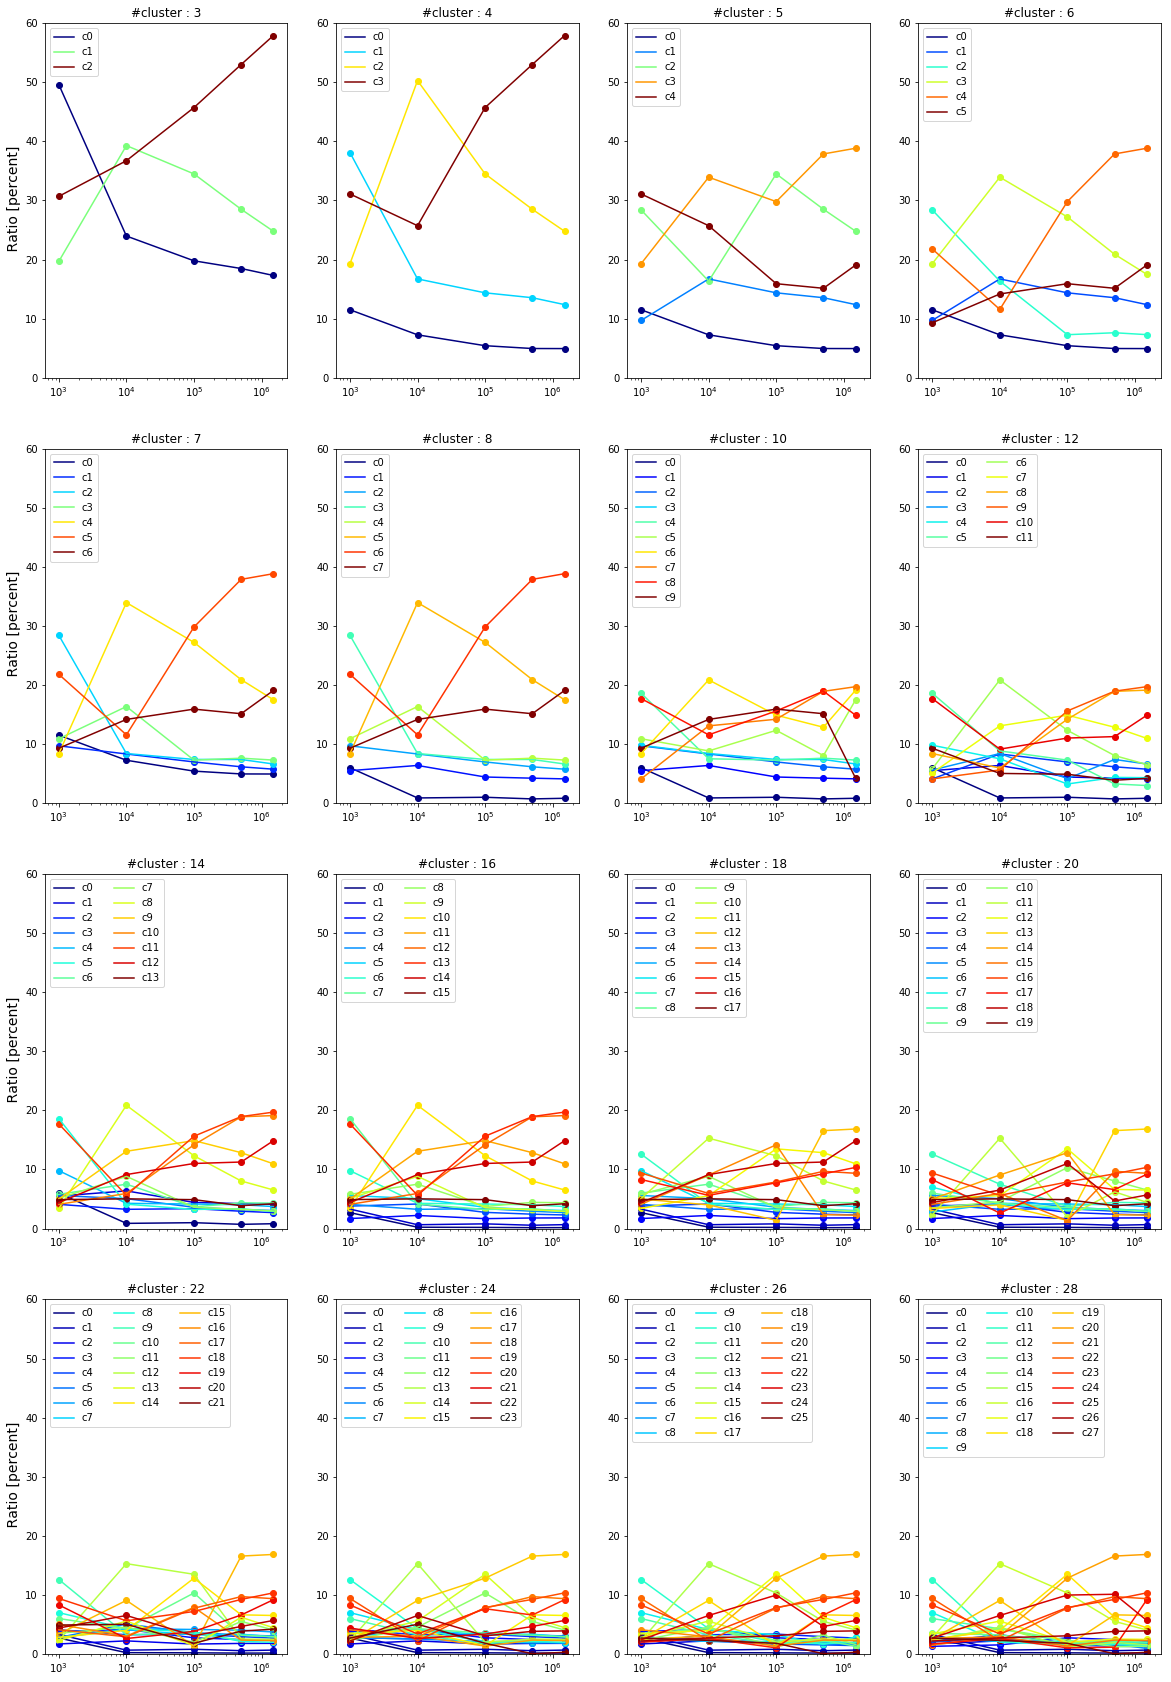

In [28]:
plt.figure(figsize=(20,30))
for index,iarray in enumerate(ratio_array):
    ax = plt.subplot(4, 4, index+1)
    colors = _get_colors(n=n_clusters[index])
    ax.set_title("#cluster : %d" % n_clusters[index])
    _iarray = _gen_iarray(iarray)
    for cdx, i in enumerate(range(n_clusters[index]) ):
        plt.plot([x*1000 for x in ranges], _iarray[:,i],color=colors[i], label='c'+str(i))
        plt.scatter([x*1000 for x in ranges], _iarray[:,i], color=colors[i])
        plt.xscale("log")
        plt.ylim(0,60)
        if index % 4 == 0:
            plt.ylabel(" Ratio [percent]", fontsize=14)
        if n_clusters[index] > 10 and n_clusters[index] <= 20:
            ncol=2
        elif n_clusters[index] > 20 and n_clusters[index] <= 30:
            ncol=3
        else:
            ncol=1
        plt.legend(loc='upper left', ncol=ncol) 

### Derivative of cluster runs

In [51]:
ranges_labels = [
    "1K-10K",
    "10K-100K",
    "100K-1000K",
    "1000K-1500K"
]

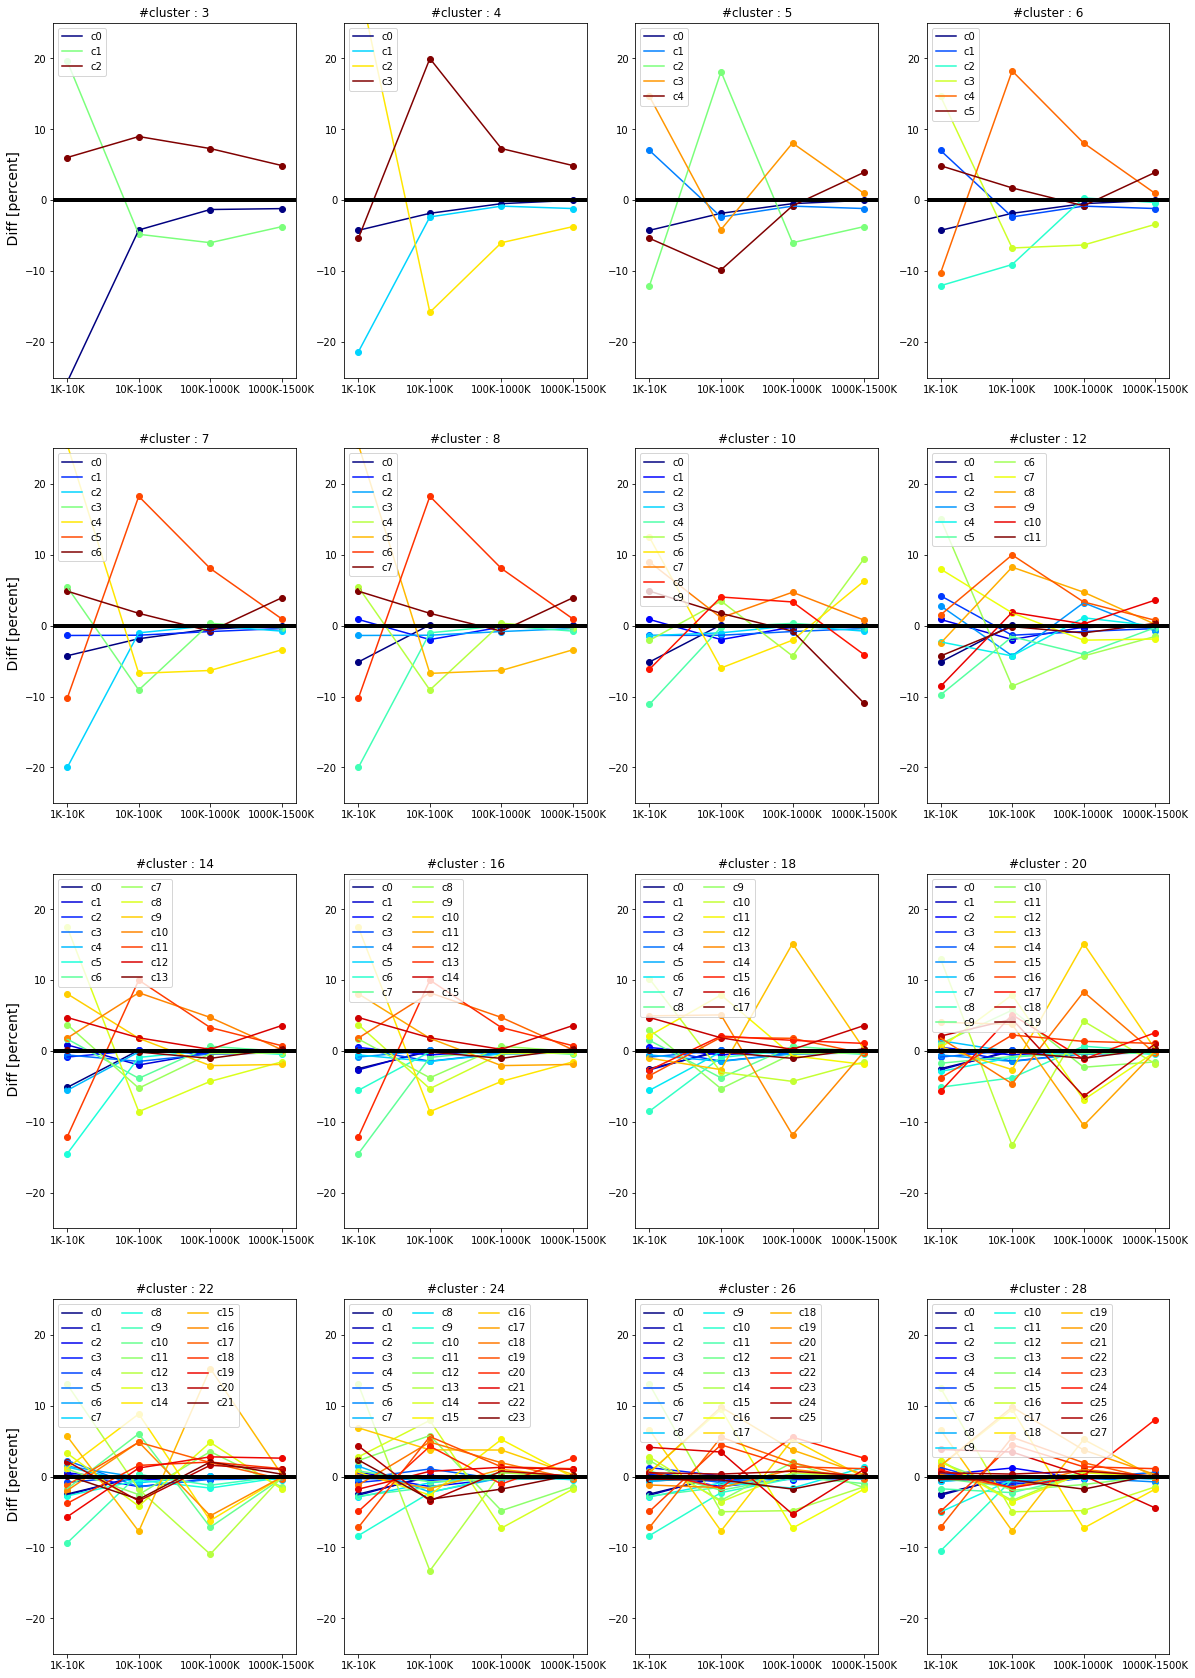

In [53]:
plt.figure(figsize=(20,30))
for index,iarray in enumerate(ratio_array):
    ax = plt.subplot(4, 4, index+1)
    colors = _get_colors(n=n_clusters[index])
    ax.set_title("#cluster : %d" % n_clusters[index])
    _iarray = _gen_iarray(iarray)
    # take diff
    diff_iarray = np.diff(_iarray, n=1, axis=0)
    #print(diff_iarray.shape)
    for cdx, i in enumerate(range(n_clusters[index]) ):
        plt.plot( np.arange(len(ranges)-1), diff_iarray[:,i],color=colors[i], label='c'+str(i))
        plt.scatter( np.arange(len(ranges)-1), diff_iarray[:,i], color=colors[i])
        #plt.xscale("log")
        plt.ylim(-25,25)
        if index % 4 == 0:
            plt.ylabel(" Diff [percent]", fontsize=14)
        if n_clusters[index] > 10 and n_clusters[index] <= 20:
            ncol=2
        elif n_clusters[index] > 20 and n_clusters[index] <= 30:
            ncol=3
        else:
            ncol=1
        plt.legend(loc='upper left', ncol=ncol) 
        plt.axhline(linewidth=4, color='black') # black line at diff ~= 0
        plt.xticks(np.arange(len(ranges)-1), ranges_labels)

### Allow 5 %of total patches changes/flips

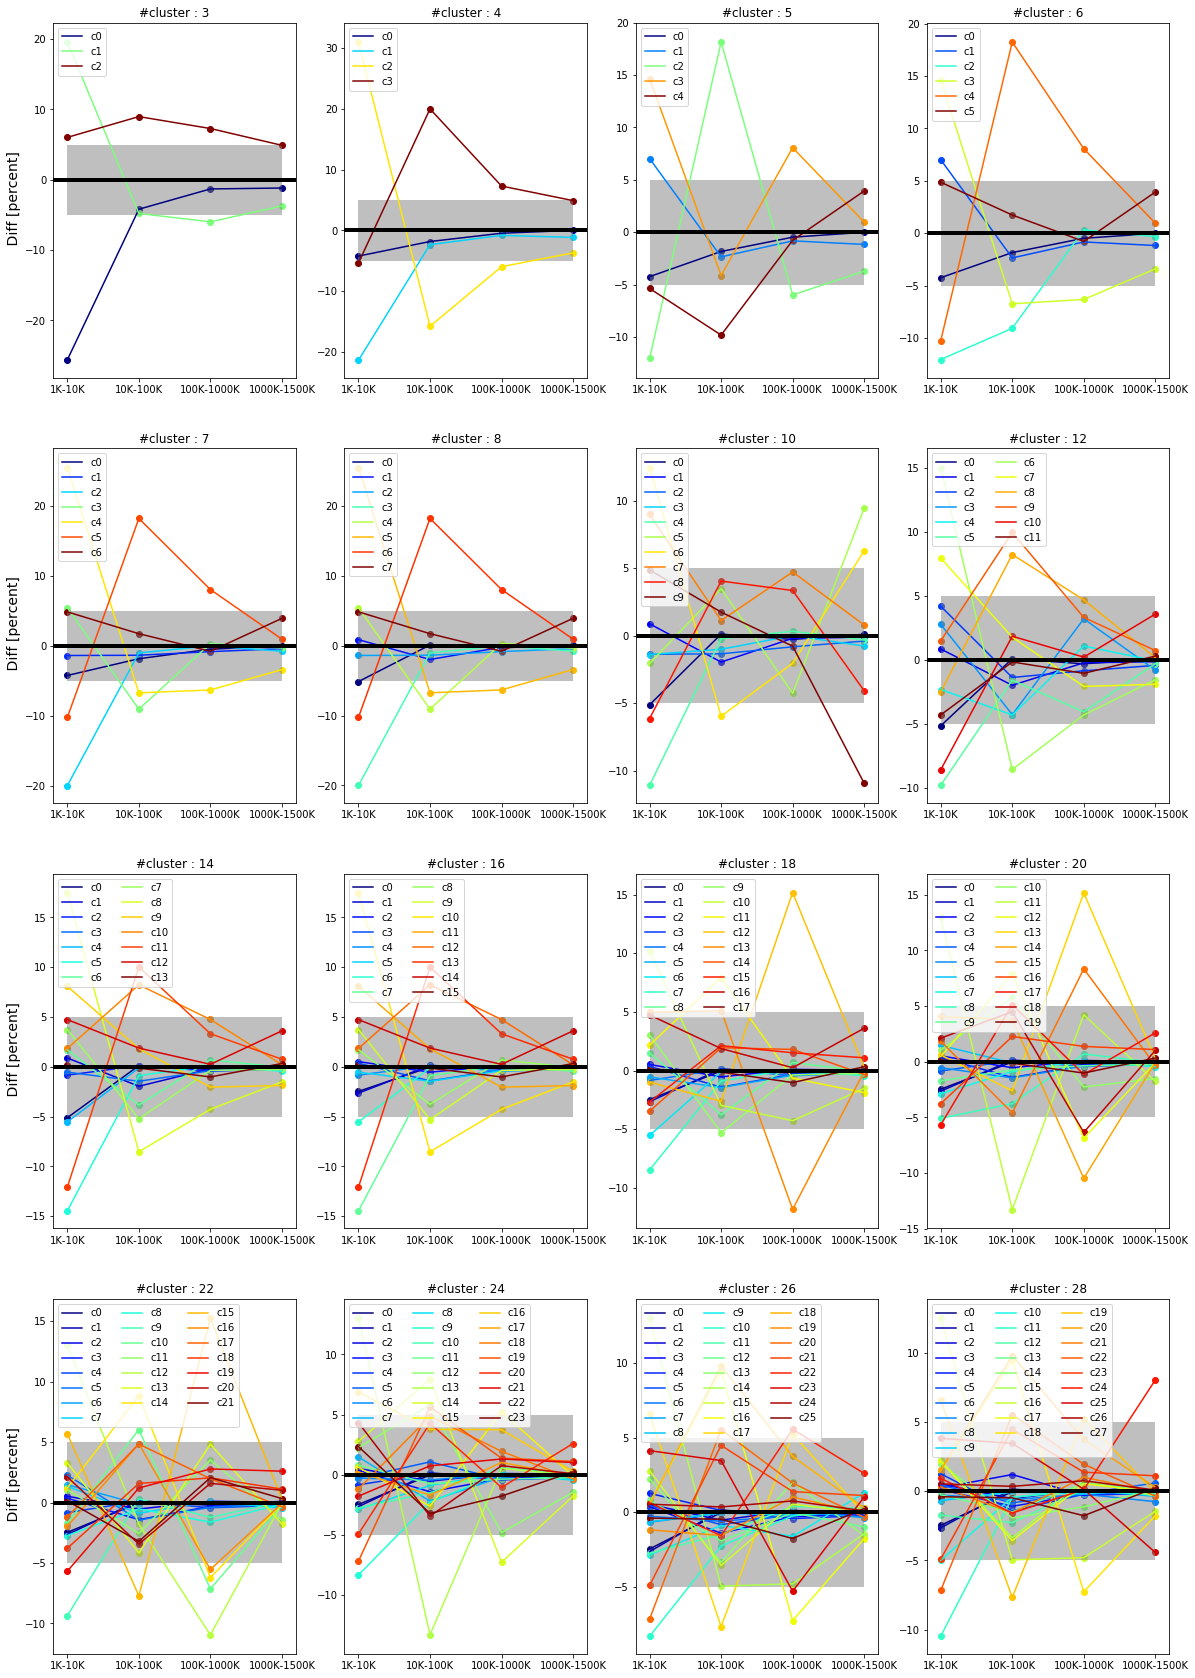

In [54]:
plt.figure(figsize=(20,30))
for index,iarray in enumerate(ratio_array):
    ax = plt.subplot(4, 4, index+1)
    colors = _get_colors(n=n_clusters[index])
    ax.set_title("#cluster : %d" % n_clusters[index])
    _iarray = _gen_iarray(iarray)
    # take diff
    diff_iarray = np.diff(_iarray, n=1, axis=0)
    #print(diff_iarray.shape)
    for cdx, i in enumerate(range(n_clusters[index]) ):
        plt.plot( np.arange(len(ranges)-1), diff_iarray[:,i],color=colors[i], label='c'+str(i))
        plt.scatter( np.arange(len(ranges)-1), diff_iarray[:,i], color=colors[i])
        #plt.xscale("log")
        #plt.ylim(0,60)
        if index % 4 == 0:
            plt.ylabel(" Diff [percent]", fontsize=14)
        if n_clusters[index] > 10 and n_clusters[index] <= 20:
            ncol=2
        elif n_clusters[index] > 20 and n_clusters[index] <= 30:
            ncol=3
        else:
            ncol=1
        plt.legend(loc='upper left', ncol=ncol) 
        plt.axhline(linewidth=4, color='black') # black line at diff ~= 0
        plt.xticks(np.arange(len(ranges)-1), ranges_labels)
    plt.fill_between( np.arange(len(ranges)-1),5,-5,facecolor='gray',alpha=0.5)

### Allow 3% change

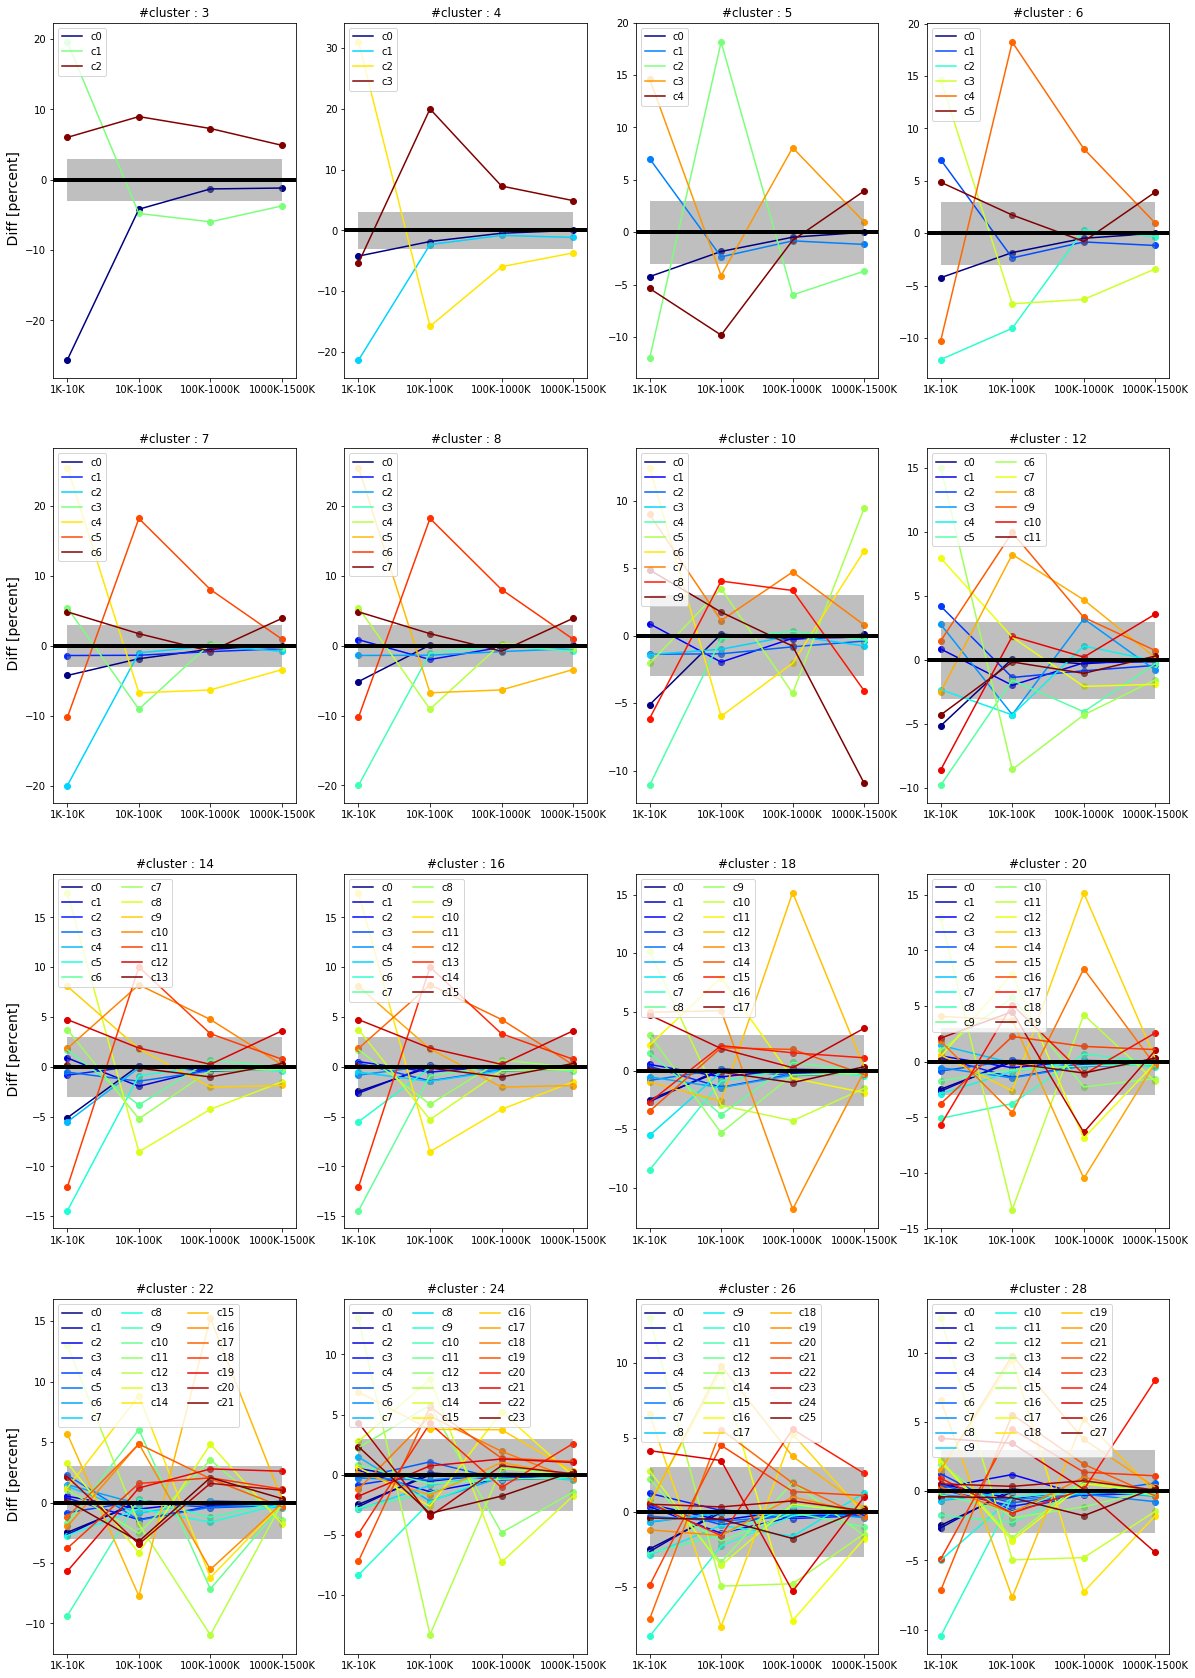

In [55]:
plt.figure(figsize=(20,30))
for index,iarray in enumerate(ratio_array):
    ax = plt.subplot(4, 4, index+1)
    colors = _get_colors(n=n_clusters[index])
    ax.set_title("#cluster : %d" % n_clusters[index])
    _iarray = _gen_iarray(iarray)
    # take diff
    diff_iarray = np.diff(_iarray, n=1, axis=0)
    #print(diff_iarray.shape)
    for cdx, i in enumerate(range(n_clusters[index]) ):
        plt.plot( np.arange(len(ranges)-1), diff_iarray[:,i],color=colors[i], label='c'+str(i))
        plt.scatter( np.arange(len(ranges)-1), diff_iarray[:,i], color=colors[i])
        #plt.xscale("log")
        #plt.ylim(0,60)
        if index % 4 == 0:
            plt.ylabel(" Diff [percent]", fontsize=14)
        if n_clusters[index] > 10 and n_clusters[index] <= 20:
            ncol=2
        elif n_clusters[index] > 20 and n_clusters[index] <= 30:
            ncol=3
        else:
            ncol=1
        plt.legend(loc='upper left', ncol=ncol) 
        plt.axhline(linewidth=4, color='black') # black line at diff ~= 0
        plt.xticks(np.arange(len(ranges)-1), ranges_labels)
    plt.fill_between( np.arange(len(ranges)-1),3,-3,facecolor='gray',alpha=0.5)

### Allow 1 % change

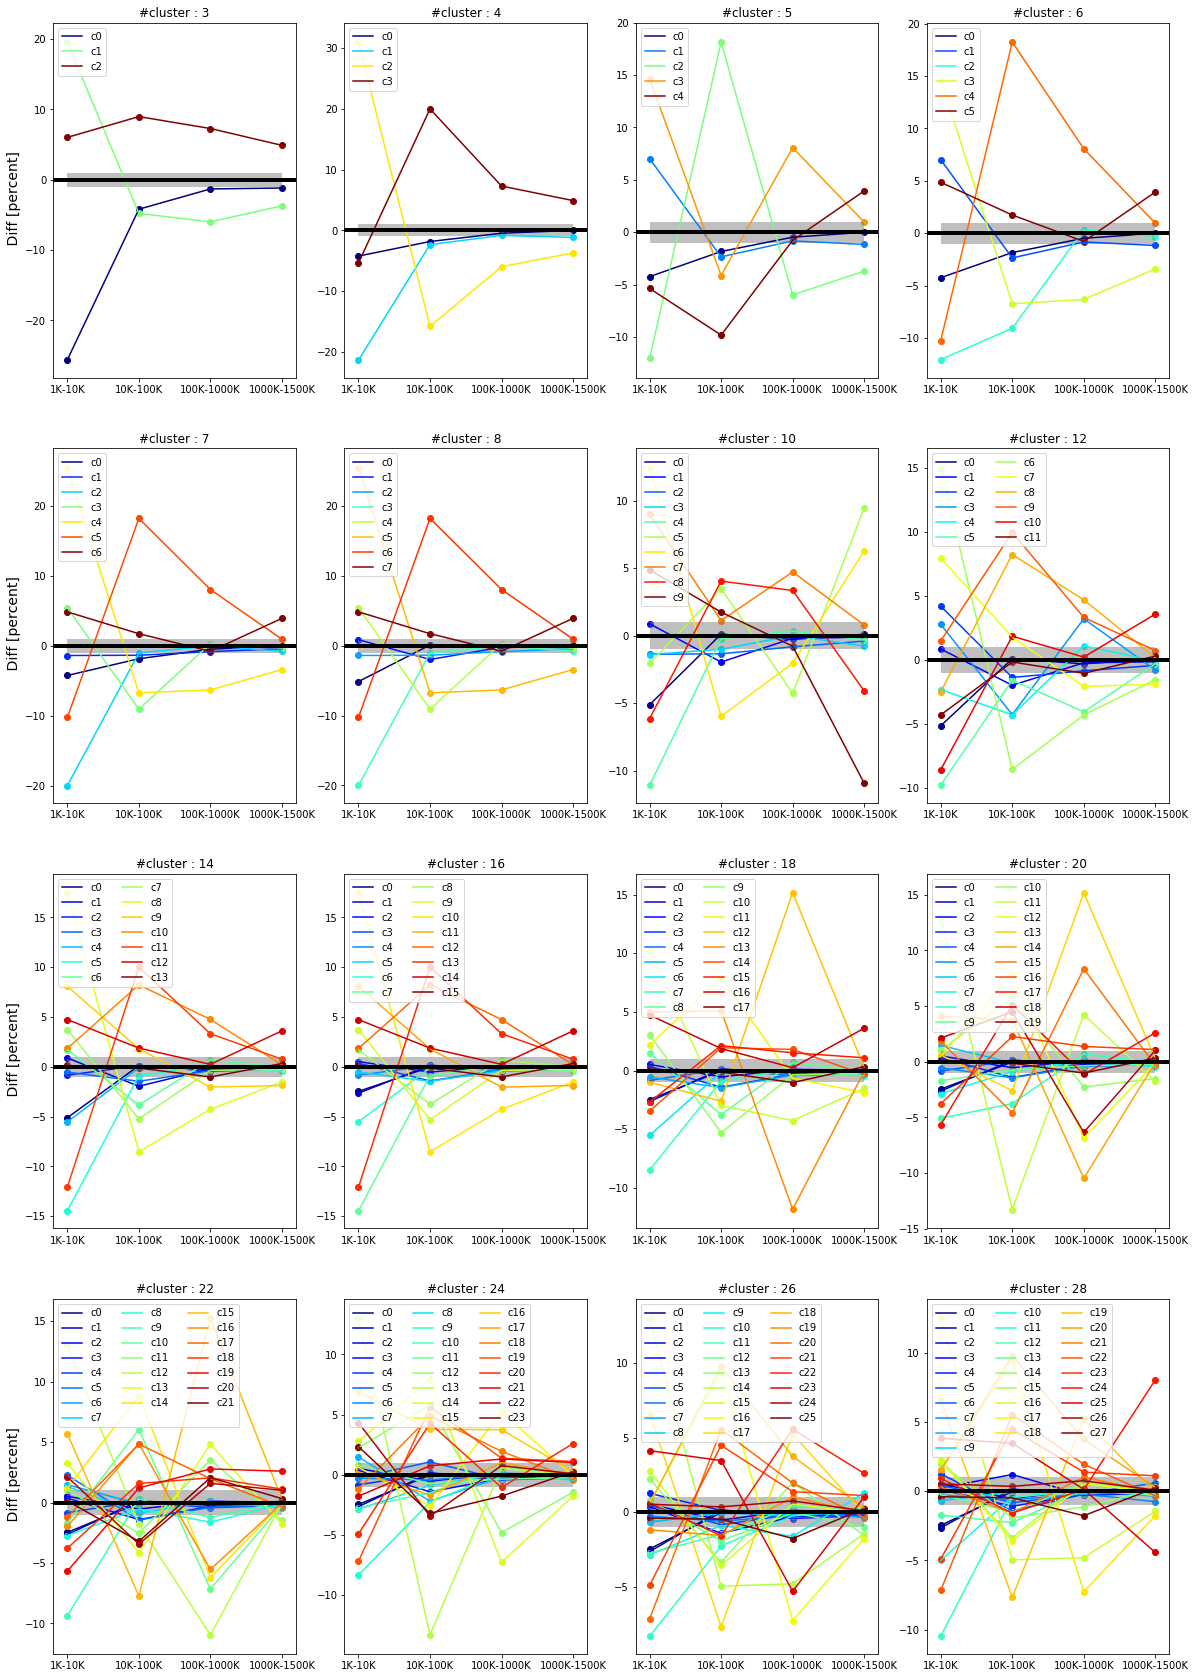

In [56]:
plt.figure(figsize=(20,30))
for index,iarray in enumerate(ratio_array):
    ax = plt.subplot(4, 4, index+1)
    colors = _get_colors(n=n_clusters[index])
    ax.set_title("#cluster : %d" % n_clusters[index])
    _iarray = _gen_iarray(iarray)
    # take diff
    diff_iarray = np.diff(_iarray, n=1, axis=0)
    #print(diff_iarray.shape)
    for cdx, i in enumerate(range(n_clusters[index]) ):
        plt.plot( np.arange(len(ranges)-1), diff_iarray[:,i],color=colors[i], label='c'+str(i))
        plt.scatter( np.arange(len(ranges)-1), diff_iarray[:,i], color=colors[i])
        #plt.xscale("log")
        #plt.ylim(0,60)
        if index % 4 == 0:
            plt.ylabel(" Diff [percent]", fontsize=14)
        if n_clusters[index] > 10 and n_clusters[index] <= 20:
            ncol=2
        elif n_clusters[index] > 20 and n_clusters[index] <= 30:
            ncol=3
        else:
            ncol=1
        plt.legend(loc='upper left', ncol=ncol) 
        plt.axhline(linewidth=4, color='black') # black line at diff ~= 0
        plt.xticks(np.arange(len(ranges)-1), ranges_labels)
    plt.fill_between( np.arange(len(ranges)-1),1,-1,facecolor='gray',alpha=0.5)